# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [42]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 2.49 s, sys: 8.92 ms, total: 2.5 s
Wall time: 5.03 s
Train ROC-AUC 0.9897
Valid ROC-AUC 0.9151
Test ROC-AUC 0.9071


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

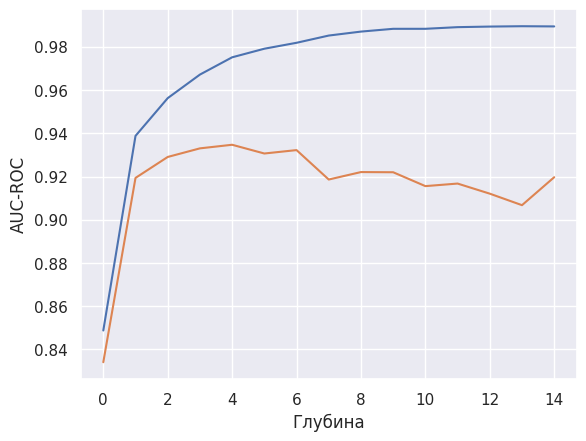

In [7]:
results = {}

depths = range(1, 30, 2)

trains, tests = [], []
# YOUR CODE:
for i in depths:
    model = Boosting({'max_depth': i})
    model.fit(x_train, y_train, x_valid, y_valid)
    trains.append(model.score(x_train, y_train))
    tests.append(model.score(x_test, y_test))

plt.plot(trains, label='train')
plt.plot(tests, label='test')
plt.title('')
plt.xlabel('Глубина')
plt.ylabel('AUC-ROC')
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

`### ваше решение тут ###`

Та модель, у которой max_depth = 4, это в принципе хорошо обобщает деревья + не переобучается на больших глубинах и на тесте наилучший AUC-ROC

То есть лучшая модель - с depth=4

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [9]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.9 MB/s eta 0:00:00


In [10]:
def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

In [15]:
# YOUR CODE:
import optuna
from sklearn.metrics import roc_auc_score

# часть кода как образца взята с репозитория optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 150, step=2)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.9, log=True)
    subsample = trial.suggest_float("subsample", 0.05, 1, step=0.05)
    max_depth = trial.suggest_int('max_depth', 1, 30, step=2)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)

    model = Boosting(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        subsample=subsample,
        base_model_params={'min_samples_split': min_samples_split, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
    )

    model.fit(x_train, y_train, x_valid, y_valid)
    return score(model, x_valid, y_valid)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50) # лучше поставить 100 или 150, но оно долго учится, можно не снимать пж((
print(f'Лучший AUC-ROC: {study.best_trial.value}')
print("Параметры для этой версии:")
for i in study.best_trial.params:
    print(i, ":", study.best_trial.params[i])

[I 2023-12-24 18:49:44,354] A new study created in memory with name: no-name-4179e337-b5ed-470d-b718-3da782ad3e3d
[I 2023-12-24 18:49:47,996] Trial 0 finished with value: 0.936316332663651 and parameters: {'n_estimators': 23, 'learning_rate': 0.04985036993000795, 'subsample': 0.4, 'max_depth': 19, 'min_samples_leaf': 13, 'min_samples_split': 6}. Best is trial 0 with value: 0.936316332663651.
[I 2023-12-24 18:49:48,457] Trial 1 finished with value: 0.9192230728277433 and parameters: {'n_estimators': 3, 'learning_rate': 0.0886030943606176, 'subsample': 0.5, 'max_depth': 21, 'min_samples_leaf': 3, 'min_samples_split': 17}. Best is trial 0 with value: 0.936316332663651.
[I 2023-12-24 18:50:42,958] Trial 2 finished with value: 0.9361515062262888 and parameters: {'n_estimators': 101, 'learning_rate': 0.16112241436262362, 'subsample': 0.7500000000000001, 'max_depth': 23, 'min_samples_leaf': 9, 'min_samples_split': 8}. Best is trial 0 with value: 0.936316332663651.
[I 2023-12-24 18:51:15,621] 

Лучший AUC-ROC: 0.9447739642873392
Параметры для этой версии:
n_estimators : 143
learning_rate : 0.48475266774430753
subsample : 0.8500000000000001
max_depth : 5
min_samples_leaf : 1
min_samples_split : 3


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [47]:
# YOUR CODE:
n_estimators = study.best_trial.params["n_estimators"]
learning_rate = study.best_trial.params["learning_rate"]
subsample = study.best_trial.params["subsample"]
max_depth = study.best_trial.params["max_depth"]
min_samples_leaf = study.best_trial.params["min_samples_leaf"]
min_samples_split = study.best_trial.params["min_samples_split"]

In [48]:
model_best = Boosting(base_model_params={
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "min_samples_split": min_samples_split,
    },
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    subsample=subsample,
)
model_best.fit(x_train, y_train, x_valid, y_valid)
y_pred_boost = model_best.predict_proba(x_test)[:, 1]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

In [36]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict_proba(x_test)[:, 1]

In [37]:
boost_true_calibration_curve, boost_prob_calibration_curve = calibration_curve(y_test, y_pred_boost, n_bins=10)
lr_true_calibration_curve, lr_prob_calibration_curve = calibration_curve(y_test, y_pred_lr, n_bins=10)

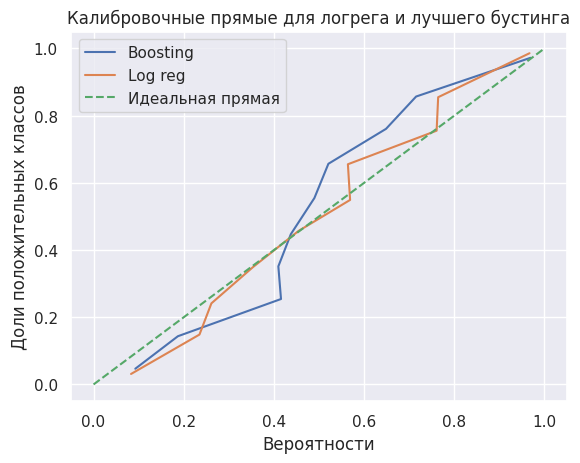

In [39]:
plt.plot(boost_true_calibration_curve, boost_prob_calibration_curve, label='Boosting')
plt.plot(lr_true_calibration_curve, lr_prob_calibration_curve, label='Log reg')
plt.plot([0, 1], [0, 1], label='Идеальная прямая', linestyle='--')

plt.title("Калибровочные прямые для логрега и лучшего бустинга")
plt.xlabel("Вероятности")
plt.ylabel("Доли положительных классов")
plt.legend()

plt.show()

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

Сорри за код, просто если я обновлю тут и перезагружу, придется все заново обучать, а тут дедл...

In [40]:
from __future__ import annotations

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor


def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])


class Boosting:

    def __init__(
            self,
            base_model_params: dict = None,
            n_estimators: int = 10,
            learning_rate: float = 0.1,
            subsample: float = 0.3,
            early_stopping_rounds: int = None,
            plot: bool = False,
    ):
        self.base_model_class = DecisionTreeRegressor
        self.base_model_params: dict = {} if base_model_params is None else base_model_params

        self.n_estimators: int = n_estimators

        self.models: list = []
        self.gammas: list = []

        self.learning_rate: float = learning_rate
        self.subsample: float = subsample

        self.early_stopping_rounds: int = early_stopping_rounds
        if early_stopping_rounds is not None:
            self.validation_loss = np.full(self.early_stopping_rounds, np.inf)

        self.plot: bool = plot

        self.history = []

        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_derivative = lambda y, z: -y * self.sigmoid(-y * z)

        self.train_loss_history = []
        self.val_loss_history = []
        self.quality_val = []

    def fit_new_base_model(self, x, y, predictions):
        generated_indexes = np.random.choice(x.shape[0], size=int(self.subsample * x.shape[0]))
        s_i = -self.loss_derivative(y[generated_indexes], predictions[generated_indexes])
        model = self.base_model_class(**self.base_model_params)
        model = model.fit(x[generated_indexes], s_i)
        gamma = self.find_optimal_gamma(s_i, predictions[generated_indexes], model.predict(x[generated_indexes]))
        self.gammas.append(gamma)
        self.models.append(model)

    def fit(self, x_train, y_train, x_valid, y_valid):
        """
        :param x_train: features array (train set)
        :param y_train: targets array (train set)
        :param x_valid: features array (validation set)
        :param y_valid: targets array (validation set)
        """
        train_predictions = np.zeros(y_train.shape[0])
        for _ in range(self.n_estimators):
            self.fit_new_base_model(x_train, y_train, train_predictions)
            self.quality_val.append(self.score(x_valid, y_valid))
            self.train_loss_history.append(self.loss_fn(self.predict_proba(x_train)[:, 1], y_train))
            self.val_loss_history.append(self.loss_fn(self.predict_proba(x_valid)[:, 1], y_valid))
            train_predictions += self.learning_rate * self.gammas[-1] * self.models[-1].predict(x_train)
            if self.early_stopping_rounds is not None:
                if np.unique(self.quality_val[-self.early_stopping_rounds:]) == 1:
                    break
        if self.plot:
            plt.plot(self.train_loss_history, label='train')
            plt.plot(self.val_loss_history, label='valid')
            plt.xlabel('iteration')
            plt.ylabel('loss value')
            plt.title("Зависимость Loss от номера итерации")
            plt.show()

    def predict_proba(self, x):
        predicts = np.zeros(x.shape[0])
        for gamma, model in zip(self.gammas, self.models):
            predicts += gamma * model.predict(x) * self.learning_rate
        predicts = np.asarray(np.matrix(self.sigmoid(predicts)).transpose())
        return np.concatenate([1 - predicts, predicts], axis=1)

    def find_optimal_gamma(self, y, old_predictions, new_predictions) -> float:
        gammas = np.linspace(start=0, stop=1, num=100)
        losses = [self.loss_fn(y, old_predictions + gamma * new_predictions) for gamma in gammas]

        return gammas[np.argmin(losses)]

    def score(self, x, y):
        return score(self, x, y)

    @property
    def feature_importances_(self):
        return np.mean(np.array([model.feature_importances_ / sum(model.feature_importances_) for model in self.models]), axis=0)


In [49]:
boosting_model = Boosting(base_model_params={
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "min_samples_split": min_samples_split,
    },
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    subsample=subsample,
)
boosting_model.fit(x_train, y_train, x_valid, y_valid)
sum(boosting_model.feature_importances_)

array([6.18778107e-03, 1.09983939e-02, 7.52665254e-03, 5.02265082e-03,
       7.05825638e-03, 7.78659986e-03, 2.46487801e-03, 2.85198071e-03,
       3.23291541e-03, 3.58811316e-03, 6.17399539e-03, 5.66678624e-04,
       7.82533165e-03, 9.45953703e-05, 4.22777524e-04, 7.77261083e-03,
       1.12361918e-03, 2.25827078e-03, 1.17118553e-03, 5.27347220e-03,
       1.09171670e-02, 6.50443629e-03, 2.56851714e-03, 7.19735995e-04,
       5.06290459e-03, 5.67801551e-03, 0.00000000e+00, 9.41357807e-03,
       2.29603717e-03, 1.44675534e-03, 1.74222783e-03, 3.51009046e-04,
       8.50205104e-04, 3.06476499e-04, 2.36779232e-03, 2.86532728e-03,
       1.81553712e-02, 7.80800046e-05, 4.92432613e-04, 0.00000000e+00,
       2.27052388e-03, 0.00000000e+00, 8.03920273e-04, 1.91356569e-03,
       0.00000000e+00, 2.37731812e-03, 1.45445516e-03, 8.24055819e-04,
       8.99699624e-04, 0.00000000e+00, 1.50985588e-03, 1.28469856e-03,
       1.12020333e-03, 1.28781249e-04, 0.00000000e+00, 0.00000000e+00,
      

In [50]:
sum(boosting_model.feature_importances_)

1.0

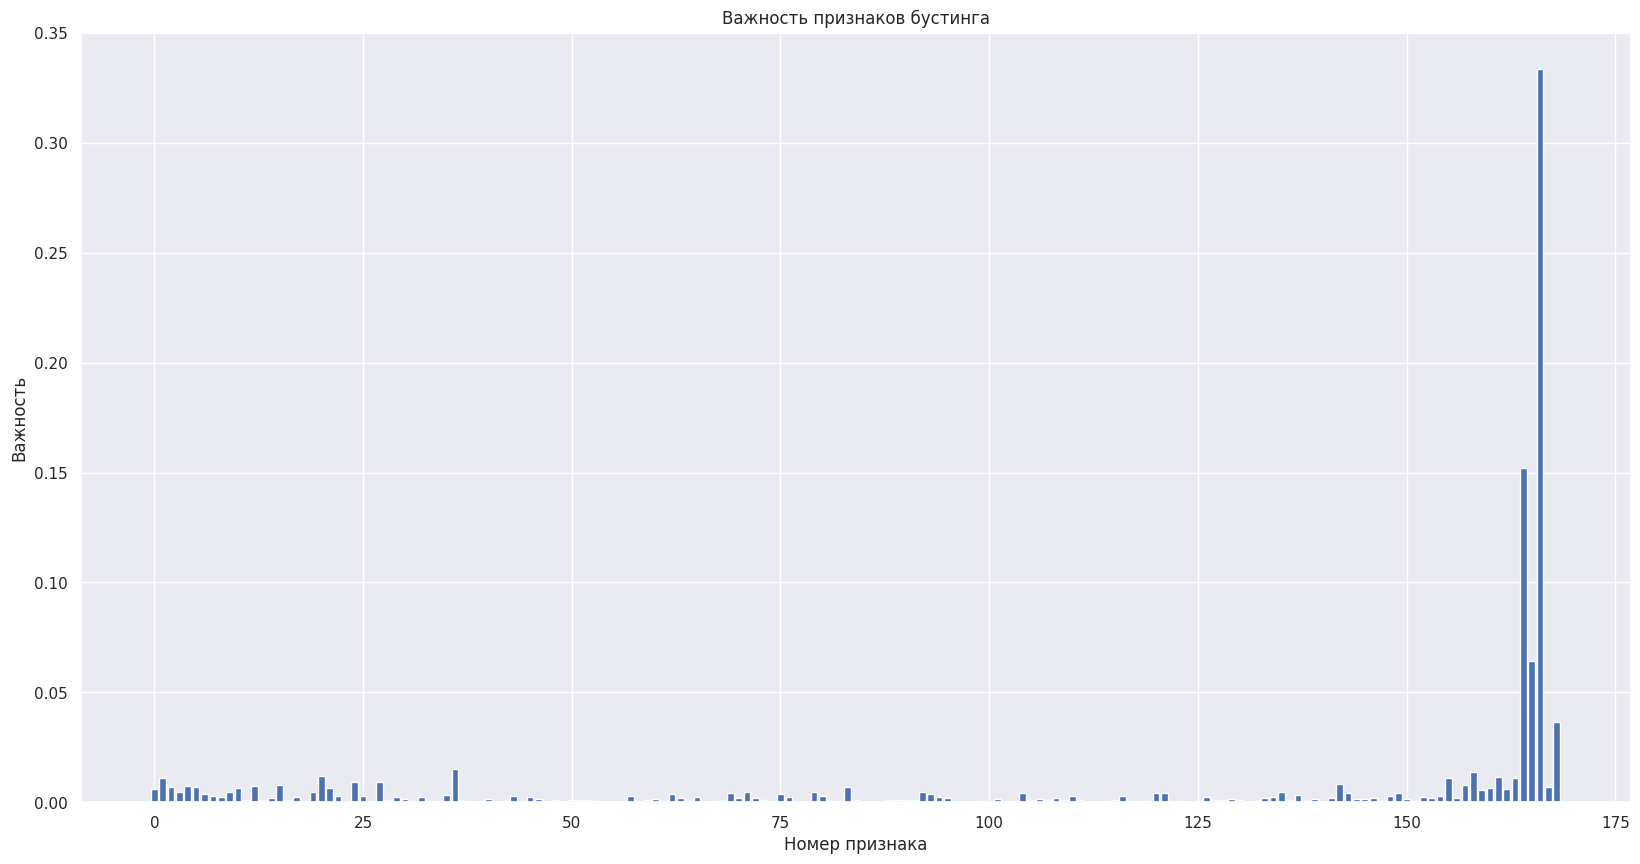

In [56]:
# YOUR CODE:
plt.figure(figsize=(20, 10))
plt.bar(x=np.arange(len(model_best.feature_importances_)), height=model_best.feature_importances_)
plt.title('Важность признаков бустинга')
plt.xlabel('Номер признака')
plt.ylabel('Важность')
plt.show()

In [58]:
lr.coef_

array([[-9.87563637e-01,  2.08899129e+00,  2.29689147e+00,
        -1.71747714e+00, -1.15257010e+00, -1.17437569e+00,
        -1.30181702e+00, -1.84768992e+00, -9.96377166e-01,
        -1.19115597e+00,  2.46659305e-01,  3.33703575e-01,
        -2.36428742e+00,  7.20031428e-01,  1.62274840e-01,
        -2.25550620e+00, -9.73886920e-01, -4.32082554e-03,
         8.31868396e-01, -5.10627079e-01,  2.85407045e+00,
         3.55636495e+00, -4.87666004e-01, -1.13058399e-01,
        -8.57525050e-02, -5.02864842e-01,  2.23194300e+00,
        -1.18160996e+00, -5.41857155e-01, -4.17231625e-01,
         3.14511751e-01,  2.26076814e-01,  2.04882059e-01,
         4.73568178e-01, -6.29476703e-01,  1.53303901e+00,
         1.78234770e+00,  6.91316399e-01,  4.63089062e-01,
        -3.71751956e-01,  1.24932052e+00,  0.00000000e+00,
        -4.39751787e-02,  1.50948355e+00,  3.76009711e-01,
        -9.41860094e-01, -7.80188034e-01, -4.10349387e-01,
         5.83011893e-01,  6.97781317e-03,  1.13520700e-0

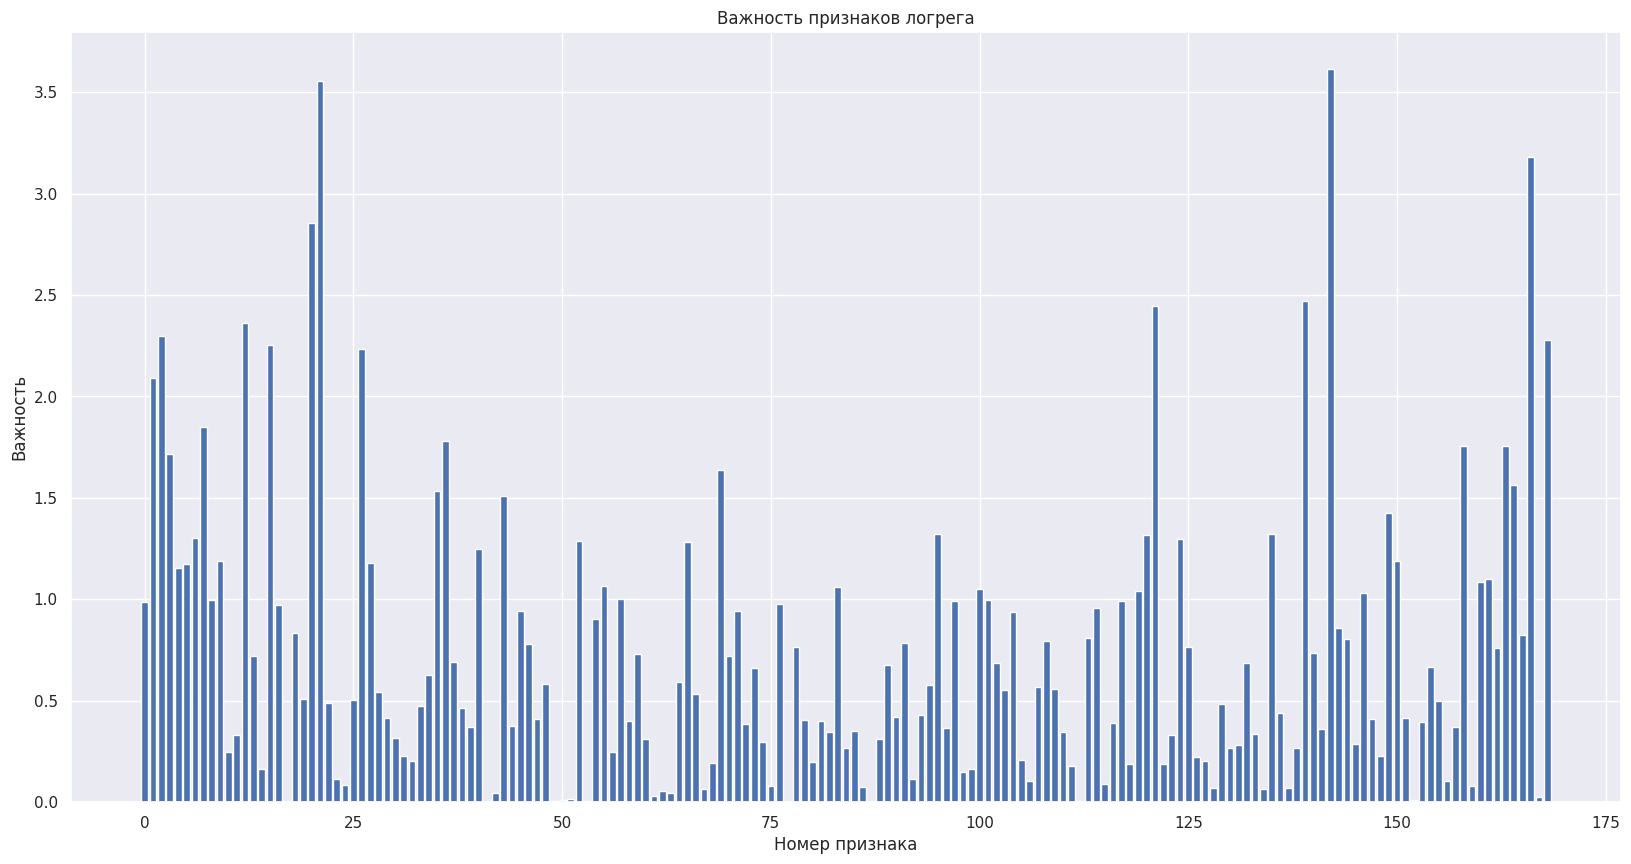

In [59]:
# YOUR CODE:
plt.figure(figsize=(20, 10))
plt.bar(x=np.arange(len(lr.coef_[0])), height=np.abs(lr.coef_[0]))
plt.title('Важность признаков логрега')
plt.xlabel('Номер признака')
plt.ylabel('Важность')
plt.show()

Видно, что у логрега почти все признаки имеют вклад и даже весомый зачастую, чего не скажешь про бустинг, у которого мало признаков вносят какой-то адекватный вклад, а тем более там вообще подавляющая часть имеет 0 важность.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [60]:
# YOUR CODE:
filter_indexes = list(range(37, 70)) + list(range(97, 130)) + list(range(170, len(model_best.feature_importances_)))

In [66]:
type(x_train)
type(x_train.toarray())

numpy.ndarray

In [69]:
fixed_features_x_train = np.delete(x_train.toarray(), filter_indexes, axis=1)
fixed_features_x_valid = np.delete(x_valid.toarray(), filter_indexes, axis=1)
fixed_features_x_test = np.delete(x_test.toarray(), filter_indexes, axis=1)

In [70]:
model_best = Boosting(base_model_params={
    "max_depth": max_depth,
    "min_samples_leaf": min_samples_leaf,
    "min_samples_split": min_samples_split,
    },
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    subsample=subsample,
)
model_best.fit(fixed_features_x_train, y_train, fixed_features_x_valid, y_valid)
y_pred_boost = model_best.predict_proba(fixed_features_x_test)[:, 1]

ValueError: ignored

In [73]:
score(model_best, fixed_features_x_test, y_test)

0.9405024696003768

Скор не поменялся, но отбросили лишние признаки

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
# YOUR CODE:

In [ ]:
class Blending:
    def __init__(self, models, blender):


## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [16]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.4 MB/s eta 0:00:00


In [17]:
# YOUR CODE:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(x_train, y_train, eval_set=(x_valid, y_valid))
score(model, x_test, y_test)

Learning rate set to 0.065429
0:	learn: 0.6161728	test: 0.6198377	best: 0.6198377 (0)	total: 71.8ms	remaining: 1m 11s
1:	learn: 0.5567827	test: 0.5635965	best: 0.5635965 (1)	total: 105ms	remaining: 52.3s
2:	learn: 0.5044197	test: 0.5145067	best: 0.5145067 (2)	total: 130ms	remaining: 43.4s
3:	learn: 0.4670266	test: 0.4791981	best: 0.4791981 (3)	total: 150ms	remaining: 37.4s
4:	learn: 0.4334759	test: 0.4485189	best: 0.4485189 (4)	total: 180ms	remaining: 35.8s
5:	learn: 0.4072797	test: 0.4239548	best: 0.4239548 (5)	total: 213ms	remaining: 35.2s
6:	learn: 0.3871996	test: 0.4065015	best: 0.4065015 (6)	total: 243ms	remaining: 34.4s
7:	learn: 0.3701940	test: 0.3919367	best: 0.3919367 (7)	total: 259ms	remaining: 32.1s
8:	learn: 0.3585821	test: 0.3818148	best: 0.3818148 (8)	total: 283ms	remaining: 31.1s
9:	learn: 0.3469983	test: 0.3722716	best: 0.3722716 (9)	total: 326ms	remaining: 32.3s
10:	learn: 0.3350014	test: 0.3618737	best: 0.3618737 (10)	total: 361ms	remaining: 32.5s
11:	learn: 0.3250519

0.9407961135087219

В целом, получился такой же почти скор, буквально на несколько сотых отличается, катбуст из коробки очень хорош и показывает тот же по сути результат

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?